# Лабораторная работа №5
## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier, 
                             ExtraTreesClassifier, AdaBoostClassifier, 
                             GradientBoostingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample

# Загрузка данных
data = pd.read_csv('HR_data.csv')

## Информация датасета

In [2]:
print("Первые 5 строк датасета:")
print(data.head())
print("\nИнформация о датасете:")
print(data.info())

Первые 5 строк датасета:
   EmpID  Age AgeGroup Attrition     BusinessTravel              Department  \
0  RM297   18    18-25       Yes      Travel_Rarely  Research & Development   
1  RM302   18    18-25        No      Travel_Rarely                   Sales   
2  RM458   18    18-25       Yes  Travel_Frequently                   Sales   
3  RM728   18    18-25        No         Non_Travel  Research & Development   
4  RM829   18    18-25       Yes         Non_Travel  Research & Development   

   DistanceFromHome EducationField EnvironmentSatisfaction  Gender  ...  \
0                 3  Life Sciences                 Average    Male  ...   
1                10        Medical                    Good  Female  ...   
2                 5      Marketing                    Poor    Male  ...   
3                 5  Life Sciences                    Poor    Male  ...   
4                 8        Medical                 Average    Male  ...   

   MonthlyIncome Over18 OverTime PercentSalaryHik

# Очистка и подготовка данных
## Проверка на пропуски

In [3]:
print("\nПропуски в данных:")
print(data.isnull().sum())


Пропуски в данных:
EmpID                      0
Age                        0
AgeGroup                   0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
Over18                     0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


## Удаление ненужных столбцов

In [4]:
data = data.drop(['EmpID', 'Over18'], axis=1)

## Преобразование категориальных переменных

In [5]:
cat_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

## Проверка дисбаланса классов

In [6]:
print("\nРаспределение целевой переменной Attrition:")
print(data['Attrition'].value_counts())


Распределение целевой переменной Attrition:
Attrition
0    1236
1     237
Name: count, dtype: int64


## Визуализация дисбаланса

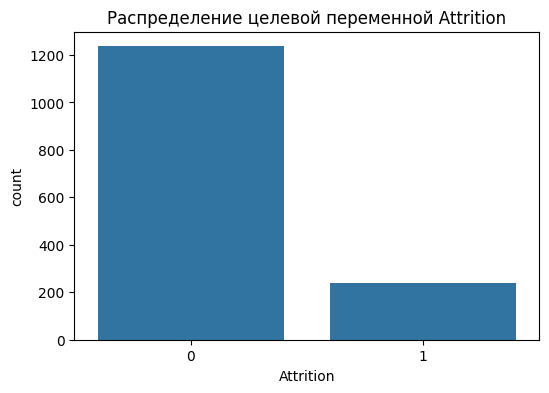

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=data)
plt.title('Распределение целевой переменной Attrition')
plt.show()

## Разделение на признаки и целевую переменную

In [8]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']

## Масштабирование числовых признаков

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Разделение на train/test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nОбучающая выборка: {X_train.shape[0]} samples")
print(f"Тестовая выборка: {X_test.shape[0]} samples")


Обучающая выборка: 1178 samples
Тестовая выборка: 295 samples


# Обучение ансамблевых моделей
## Инициализация моделей

In [11]:
models = {
    "Bagging": BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=100,
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ),
    "Extra Trees": ExtraTreesClassifier(
        n_estimators=100,
        random_state=42
    ),
    "AdaBoost": AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=100,
        random_state=42,
        algorithm='SAMME' 
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=100,
        random_state=42
    )
}

## Обучение и предсказание

In [12]:
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)
    print(f"\n{name} обучена")


Bagging обучена

Random Forest обучена

Extra Trees обучена

AdaBoost обучена

Gradient Boosting обучена


# Оценка качества моделей
## Сравнение метрик

In [13]:
metrics = []
for name, pred in predictions.items():
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1-score': f1
    })
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, pred))


Bagging:
Accuracy: 0.8508
F1-score: 0.3714
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       248
           1       0.57      0.28      0.37        47

    accuracy                           0.85       295
   macro avg       0.72      0.62      0.64       295
weighted avg       0.83      0.85      0.83       295

Confusion Matrix:
[[238  10]
 [ 34  13]]

Random Forest:
Accuracy: 0.8610
F1-score: 0.3279
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       248
           1       0.71      0.21      0.33        47

    accuracy                           0.86       295
   macro avg       0.79      0.60      0.63       295
weighted avg       0.84      0.86      0.83       295

Confusion Matrix:
[[244   4]
 [ 37  10]]

Extra Trees:
Accuracy: 0.8712
F1-score: 0.3667
Classification Report:
              precision    recall  f1-score   support

## Визуализация сравнения моделей

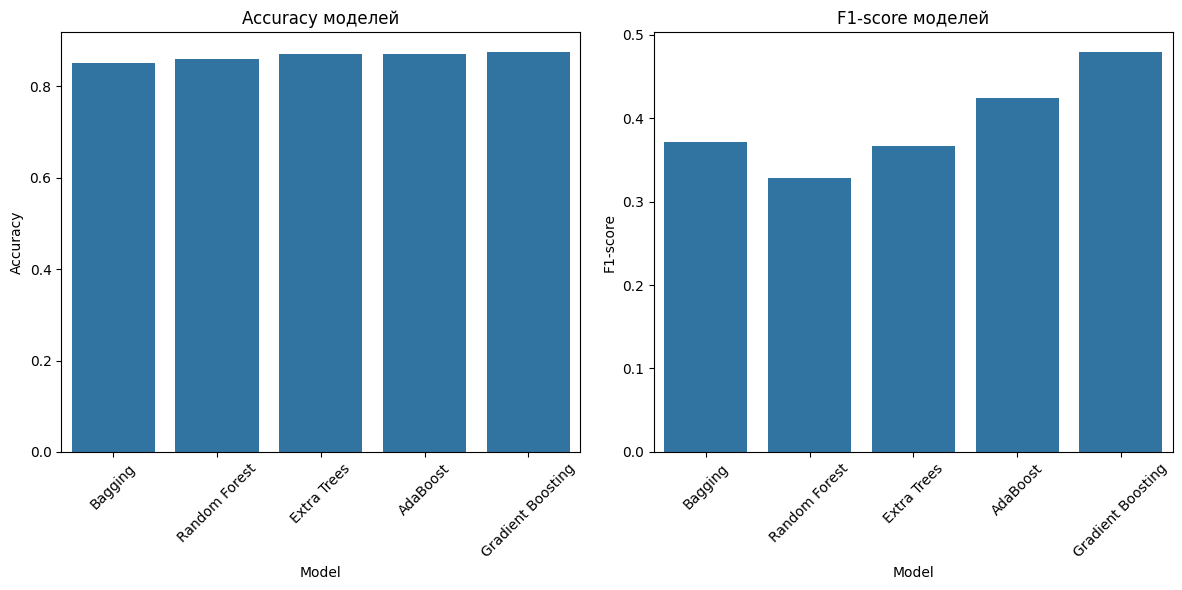

In [14]:
metrics_df = pd.DataFrame(metrics)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.title('Accuracy моделей')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='F1-score', data=metrics_df)
plt.title('F1-score моделей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Визуализация важности признаков для лучшей модели

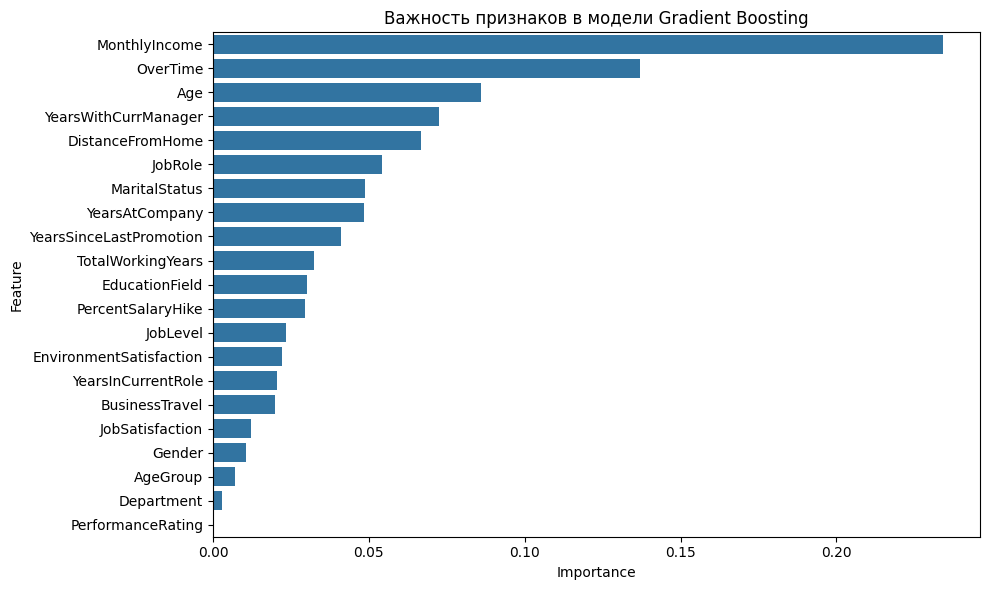

In [15]:
best_model_name = metrics_df.loc[metrics_df['F1-score'].idxmax(), 'Model']
best_model = models[best_model_name]

if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
elif hasattr(best_model, 'estimators_'):
    importances = np.mean([tree.feature_importances_ for tree in best_model.estimators_], axis=0)
    
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title(f'Важность признаков в модели {best_model_name}')
plt.tight_layout()
plt.show()